# Networks in python
Networks play an important role in data science, with Google (page rank), Uber (route optimisation), Amazon (supply chian optimisation) and other companies becoming technology giants using network and data related optimisations. This article is an introduction to using networks in python using *networkx* package.

In [1]:
# Import networkx library and rename it as nx. 
import networkx as nx

# Other packages required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Undirected graphs
A network can be represented in many ways. Edgelist represents graphs as a list of edges. Graphs can be undirected or directed. Consider the below edgelist where there is a relation between edge 1 and edge 2, and the weight for that edge is also provided.

In [2]:
edgelist_df = pd.DataFrame({'node1':[1,1,1,2,2,3,4,4], 'node2':[2,3,4,4,5,5,3,5], 'weights':[5,2,1,3,1,7,1,4]})
edgelist_df

,node1,node2,weights
0,1,2,5
1,1,3,2
2,1,4,1
3,2,4,3
4,2,5,1
5,3,5,7
6,4,3,1
7,4,5,4


One way to create a graph is to create an empty graph and add edges (and nodes) to the graph. 

In [3]:
g = nx.Graph()
for i, elrow in edgelist_df.iterrows():
    g.add_edge(elrow[0], elrow[1], weight=elrow[2])
    g.add_node(1,pos=(0,5))
g.edges(data=True)

EdgeDataView([(1, 2, {'weight': 5}), (1, 3, {'weight': 2}), (1, 4, {'weight': 1}), (2, 4, {'weight': 3}), (2, 5, {'weight': 1}), (3, 5, {'weight': 7}), (3, 4, {'weight': 1}), (4, 5, {'weight': 4})])

In [4]:
# for each node we are trying to fix the coordinates
g.add_node(1,pos=(0,5))
g.add_node(2,pos=(5,10))
g.add_node(3,pos=(5,0))
g.add_node(4,pos=(10,5))
g.add_node(5,pos=(15,5))
g.nodes(data=True)

NodeDataView({1: {'pos': (0, 5)}, 2: {'pos': (5, 10)}, 3: {'pos': (5, 0)}, 4: {'pos': (10, 5)}, 5: {'pos': (15, 5)}})

This grah can be visualised as follows:

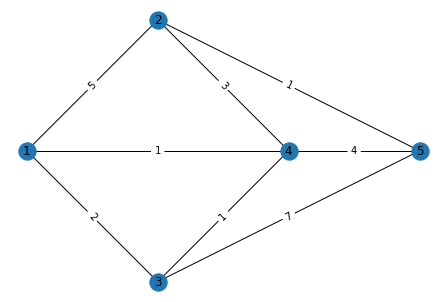

In [5]:
# This function gets the coordinates for nodes
pos = nx.get_node_attributes(g,'pos')

# This function gets the weights for the edges 
weight = nx.get_edge_attributes(g,'weight')

# The simplest way to draw a graph is by using nx.draw. 
nx.draw(g,pos, with_labels=True)

# This adds edge lables
nx.draw_networkx_edge_labels(g,pos,edge_labels = weight)
plt.show()

Mathematically this grah can be described in many ways. The most important are the adjacency matrix and incidence matrix. The adjacency matrix shows the relationship between the nodes in a matrix format where the nodes represent rows and columns. An edge between two nodes is represented by a positve number in the adjacency matrix, and the magnitude represents the weight.

In [6]:
nx.linalg.graphmatrix.adj_matrix(g).toarray()

array([[0, 5, 2, 1, 0],
       [5, 0, 0, 3, 1],
       [2, 0, 0, 1, 7],
       [1, 3, 1, 0, 4],
       [0, 1, 7, 4, 0]], dtype=int64)

The concurrency matrix represents the relationship between the nodes and edges. We have 8 edges as shown, and the relationship between the 5 nodes and 8 edges is shown below.

In [7]:
g.edges

EdgeView([(1, 2), (1, 3), (1, 4), (2, 4), (2, 5), (3, 5), (3, 4), (4, 5)])

In [8]:
nx.linalg.graphmatrix.incidence_matrix(g).toarray()

array([[1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1., 1., 0., 1.]])

## Directed graph. 
A directed graph has edges which are in a particular direction. In this example, we are creating a DiGraph and reading a file where the edgelist is defined. An edge from a to b with a weight W exists when a line "a b W" can be found in the file.

In [9]:
G1 = nx.DiGraph()
# Read an directed graph from a list of edges, need to specify that using the parameter ‘create_using’
G1 = nx.read_edgelist("edgelist1.txt", nodetype = str, create_using = nx.DiGraph(),data = [('weight', int)])

print('Edgelist')
import sys
nx.write_weighted_edgelist(G1, sys.stdout)

print('nodes')
print(G1.nodes(data=True))
print('edges')
print(G1.edges(data=True))

Edgelist
0 1 4
0 3 4
0 4 2
1 0 4
1 2 9
1 4 1
2 3 4
3 1 8
3 4 7
nodes
[('0', {}), ('1', {}), ('2', {}), ('3', {}), ('4', {})]
edges
[('0', '1', {'weight': 4}), ('0', '3', {'weight': 4}), ('0', '4', {'weight': 2}), ('1', '0', {'weight': 4}), ('1', '2', {'weight': 9}), ('1', '4', {'weight': 1}), ('2', '3', {'weight': 4}), ('3', '1', {'weight': 8}), ('3', '4', {'weight': 7})]


This graph can be visualised in many ways. Some of the visualisation patterns are (And these visualisations are same for directed or undirected graphs)
1. Spring layout (The length of edges is proportional to the weights)
2. Circular layout (The nodes are present in a circle)
3. Random layout  
All the three layouts are shown below

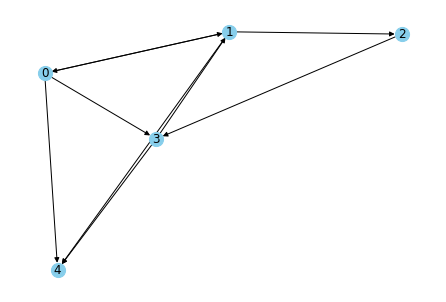

In [10]:
nx.draw_spring(G1, with_labels = True, node_color='skyblue', node_size=200,  edge_color='black')

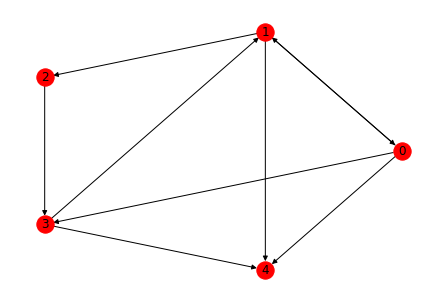

In [11]:
nx.draw_circular(G1, with_labels = True, node_color = 'red', node_size = 300,  edge_color = 'black')

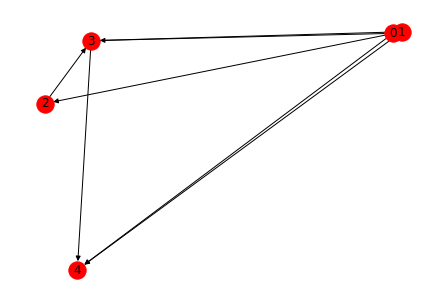

In [12]:
nx.draw_random(G1, with_labels = True, node_color = 'red', node_size = 300,  edge_color = 'black')

The concurrency matrix looks differently for directed graphs. If a edge is leaving a node it is represented by -1 and if it is incoming to a node i is +1.

In [13]:
nx.linalg.graphmatrix.incidence_matrix(G1, oriented=True).toarray()

array([[-1., -1., -1.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0., -1., -1., -1.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0., -1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  1., -1., -1.],
       [ 0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.]])

We can read from not just edgelists but also from adjacency matrix. For instance, we can create a new graph using the adjacency matrix from the directed graph.

In [14]:
# Adjacencey matrix of the graph G1
M1 = nx.linalg.graphmatrix.adj_matrix(G1).toarray()
print('Adjacency matrix of G1')
print(M1)

# convert the matrix into a graph
G2 = nx.from_numpy_matrix(M1)

# Print the graph information
print("Printing G2")
nx.write_weighted_edgelist(G2, sys.stdout)

Adjacency matrix of G1
[[0 4 0 4 2]
 [4 0 9 0 1]
 [0 0 0 4 0]
 [0 8 0 0 7]
 [0 0 0 0 0]]
Printing G2
0 1 4
0 3 4
0 4 2
1 2 9
1 4 1
1 3 8
2 3 4
3 4 7


## Visualisation of graphs
We can display the graphs using a variety of methods. The weights among the edges can be represented as thickness (or color) of the edges, the importance of nodes can be defined, etc. This will provide additional information of the graph.

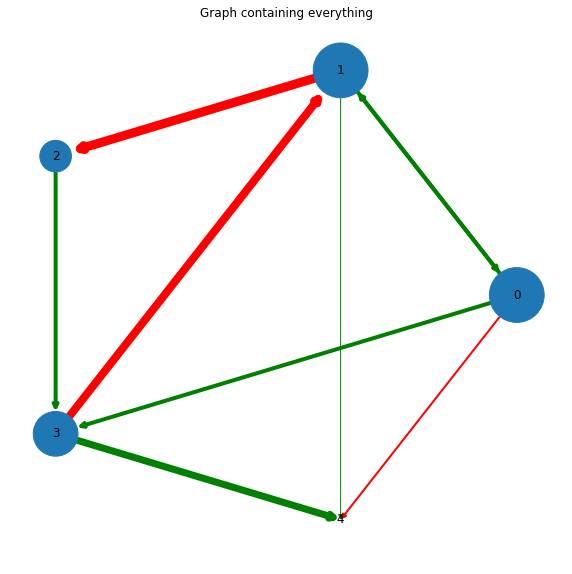

In [15]:
# get the outward degree for each node and store them as a list of (node_number, degree)
out_deg = G1.out_degree()

# Making all the required parameters
out_deg = [int(out_deg[node])*1000 for node in G1.nodes()]
color = ['g' if val>np.mean(out_deg) else 'r' for val in out_deg]
weight = list(nx.get_edge_attributes(G1,'weight').values())
degree = dict(G1.degree)

# create the plot and title
plt.subplots(figsize=(10,10))
plt.title('Graph containing everything')
nx.draw_circular(G1, with_labels=True, edge_color=color, width=weight, node_size=out_deg)


Anther different type of graph is the bipartite graph, which has a visualisation of its own. In the below example, we take an inbilt biparite graph to show how it can be visualised.

In [16]:
B = nx.bipartite.gnmk_random_graph(3, 5, 10, seed=123)

top = nx.bipartite.sets(B)[0]

pos = nx.bipartite_layout(B, top)

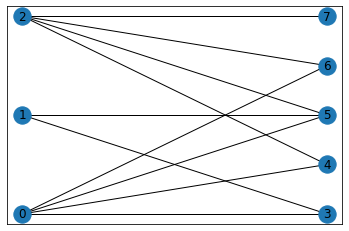

In [17]:
nx.draw_networkx(B,pos = nx.drawing.layout.bipartite_layout(B, top))